In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('health_data.csv')

In [3]:
df.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,3.828641,7.7,6.8,6.1,33.4,0.93,112,70,...,0,2,1,2,0,0,0,0,0,1.0
1,50,2,4.304065,5.7,6.5,5.8,23.8,0.83,120,77,...,0,4,1,4,2,0,0,0,0,1.0
2,32,3,5.068904,8.5,7.4,9.1,24.1,0.83,95,89,...,1,2,1,2,2,1,0,0,0,0.0
3,54,3,4.356709,4.6,7.0,9.2,26.6,0.83,121,69,...,0,4,1,2,0,0,0,1,0,1.0
4,54,1,4.025352,5.7,6.2,5.1,28.8,0.90,108,60,...,1,4,1,4,2,1,0,1,0,1.0


In [4]:
X = df.iloc[:,:24]
y = df['diagnosed_diabetes']

In [5]:
X.shape

(699997, 24)

In [6]:
X.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,31,1,3.828641,7.7,6.8,6.1,33.4,0.93,112,70,...,102,0,2,1,2,0,0,0,0,0
1,50,2,4.304065,5.7,6.5,5.8,23.8,0.83,120,77,...,124,0,4,1,4,2,0,0,0,0
2,32,3,5.068904,8.5,7.4,9.1,24.1,0.83,95,89,...,108,1,2,1,2,2,1,0,0,0
3,54,3,4.356709,4.6,7.0,9.2,26.6,0.83,121,69,...,123,0,4,1,2,0,0,0,1,0
4,54,1,4.025352,5.7,6.2,5.1,28.8,0.90,108,60,...,124,1,4,1,4,2,1,0,1,0


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
scaler = StandardScaler()

In [9]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [11]:
res = []
for i in range(1,25):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train_scale)
    X_test_trf = pca.transform(X_test_scale)
    for j in range(1,15):
        knn = KNeighborsClassifier(n_neighbors=j,weights='distance')
        knn.fit(X_train_trf,y_train)
        y_pred = knn.predict(X_test_trf)
        acc = accuracy_score(y_test,y_pred)
        res.append({
            "PCA_COM":i,
            "n_neighbor":j,
            "acc":acc
        })
df_res = pd.DataFrame(res)

In [15]:
df_res[df_res['acc'] == 0.6299357142857143]

,PCA_COM,n_neighbor,acc
307,22,14,0.629936


In [16]:
df_res.to_csv('model.csv',index=False)

In [20]:
pca = PCA(n_components=22)
X_train_trf = pca.fit_transform(X_train_scale)
X_test_trf = pca.transform(X_test_scale)

In [21]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.6238571428571429

In [11]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_scale)
X_test_trf = pca.transform(X_test_scale)

In [12]:
pca.explained_variance_

array([2.77619491, 1.69091455, 1.32517578, 1.27682824, 1.07911408,
       1.0368203 , 1.01251145, 1.0090139 , 1.00543764, 1.00170503,
       0.9964759 , 0.99633692, 0.99243295, 0.99092288, 0.98746038,
       0.95247369, 0.93563416, 0.9001806 , 0.87331425, 0.71819687,
       0.66758963, 0.45665074, 0.23014113, 0.08851688])

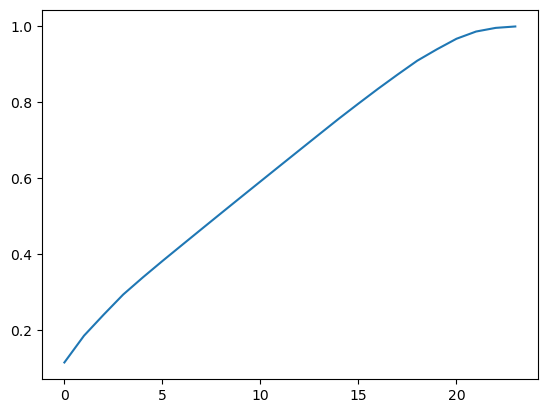

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [15]:
model = []
for i in range(21,25):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train_scale)
    X_test_trf = pca.transform(X_test_scale)
    for j in range(12,18):
        knn = KNeighborsClassifier(n_neighbors=j,weights='distance')
        knn.fit(X_train_trf,y_train)
        y_pred = knn.predict(X_test_trf)
        acc = accuracy_score(y_test,y_pred)
        model.append({
            "PCA_COM":i,
            "n_neighbor":j,
            "acc":acc
        })
df_res = pd.DataFrame(model)

In [16]:
df_res

,PCA_COM,n_neighbor,acc
0,21,12,0.625757
1,21,13,0.628564
2,21,14,0.628364
3,21,15,0.631129
4,21,16,0.630643
5,21,17,0.633257
6,22,12,0.627079
7,22,13,0.629171
8,22,14,0.629936
9,22,15,0.631907


In [10]:
pca = PCA(n_components=22)
X_train_trf = pca.fit_transform(X_train_scale)
X_test_trf = pca.transform(X_test_scale)

In [11]:
knn = KNeighborsClassifier(n_neighbors=14,weights='distance')
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.6299357142857143

In [13]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [14]:
knn = KNeighborsClassifier(n_neighbors=14, weights='distance')

In [15]:
sfs = SFS(knn,
          k_features=(5, 22),      # try between 5 to all PCA components
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5,
          n_jobs=-1)


In [16]:
sfs.fit(X_train_trf, y_train)


C:\Users\dell g3\AppData\Roaming\Python\Python313\site-packages\sklearn\externals\_numpydoc\docscrape.py:203: UserWarning: potentially wrong underline length... 
Examples 
----------- in 
Sequential Feature Selection for Classification and Regression.
...
  while not self._is_at_section() and not self._doc.eof():


,estimator,KNeighborsCla...ts='distance')
,k_features,"(5, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,'accuracy'
,cv,5
,n_jobs,-1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [17]:

sfs.k_score_


np.float64(0.6344569696731986)

In [18]:
sfs.k_feature_idx_



(0, 3, 4, 6, 10, 12, 18, 19, 21)

In [19]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
metric_df['Observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))

In [22]:
metric_df.to_csv('Sequential_Feature_Selector.csv',index=False)

In [23]:
metric_df[metric_df['avg_score'] == 0.6344569696731986]

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,Observations,num_features
9,"(0, 3, 4, 6, 10, 12, 18, 19, 21)","[0.6344642857142857, 0.6348035714285715, 0.634...",0.634457,"(0, 3, 4, 6, 10, 12, 18, 19, 21)",0.000656,0.000511,0.000255,404,9


In [24]:
X_train_trf

array([[-0.67507753, -2.97031625, -1.57672336, ..., -0.48333211,
        -1.12958428, -0.05972108],
       [-2.31485749,  1.05420753,  0.71643016, ...,  0.14177627,
         0.22406168,  0.9976593 ],
       [ 2.5878747 , -0.81094472,  0.30343371, ..., -0.51672764,
        -0.67862818,  1.23836891],
       ...,
       [-0.07503498, -1.48675858,  2.95659825, ...,  0.89697379,
         0.05529669,  0.25803235],
       [-1.05505893, -0.90128004,  0.00954869, ...,  0.55587732,
         0.11618862, -1.17349188],
       [ 0.80152988, -0.58120587, -2.49431644, ...,  1.23967062,
         0.75294673, -0.31334893]], shape=(559997, 22))

In [25]:
X_test_trf

array([[-1.10025522, -0.4351035 , -1.49353306, ..., -0.01017821,
         1.67349973, -0.08688866],
       [ 0.33791398, -1.26718986, -1.33673269, ..., -1.07958602,
        -0.79814597, -0.1084004 ],
       [-0.46911165, -0.59395185,  1.28758584, ..., -0.10069808,
        -0.77037336, -0.30965601],
       ...,
       [-0.63128847, -0.60776451,  0.84810585, ...,  0.70904563,
         0.51212836,  0.18641729],
       [ 1.13840085,  2.45019499, -0.32527643, ..., -0.62973619,
        -0.17578571, -0.91520578],
       [-1.39890146,  0.51838094,  0.14610557, ...,  0.30941104,
        -0.38238348, -0.40902011]], shape=(140000, 22))

In [26]:
best_idx = [0, 3, 4, 6, 10, 12, 18, 19, 21]

In [27]:
X_train_trf_best_idx = X_train_trf[:,best_idx]
X_test_trf_best_idx = X_test_trf[:,best_idx]

In [28]:
knn = KNeighborsClassifier(n_neighbors=14, weights='distance')
knn.fit(X_train_trf_best_idx,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",14
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [29]:
y_pred = knn.predict(X_test_trf_best_idx)

In [30]:
accuracy_score(y_test,y_pred)

0.6336142857142857

In [32]:
confusion_matrix(y_test,y_pred)

array([[19216, 33388],
       [17906, 69490]])

In [34]:
print("KNeighborsClassifier")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("precision - ",precision_score(y_test,y_pred))
print("recall - ",recall_score(y_test,y_pred))
print("f1_score - ",f1_score(y_test,y_pred))

KNeighborsClassifier
--------------------------------------------------
       0      1
0  19216  33388
1  17906  69490
--------------------------------------------------
precision -  0.6754602538929606
recall -  0.7951164813034921
f1_score -  0.7304203411921755


In [36]:
y_prob = knn.predict_proba(X_test_trf_best_idx)[:,1]   # probability of diabetes


In [37]:
def apply_threshold(y_prob, threshold):
    return (y_prob >= threshold).astype(int)

In [38]:
for t in [0.5, 0.4, 0.3, 0.25, 0.2]:
    y_new = apply_threshold(y_prob, t)
    tn, fp, fn, tp = confusion_matrix(y_test, y_new).ravel()
    print(f"Threshold {t}")
    print("FN:", fn, " | Recall:", recall_score(y_test, y_new))
    print()

Threshold 0.5
FN: 17906  | Recall: 0.7951164813034921

Threshold 0.4
FN: 7534  | Recall: 0.9137946816787954

Threshold 0.3
FN: 3176  | Recall: 0.9636596640578516

Threshold 0.25
FN: 1411  | Recall: 0.9838550963430821

Threshold 0.2
FN: 536  | Recall: 0.9938669962011991



In [42]:
final_pred = apply_threshold(y_prob, 0.25)
accuracy_score(y_test, final_pred)

0.6312357142857142

In [44]:
best_t = 0
best_acc = 0

for t in np.arange(0.2, 0.81, 0.02):
    preds = (y_prob >= t).astype(int)
    acc = accuracy_score(y_test, preds)
    if acc > best_acc:
        best_acc = acc
        best_t = t

best_t, best_acc


(np.float64(0.3999999999999999), 0.6399428571428571)

In [46]:
final_test_pred = (y_prob >= best_t).astype(int)


In [48]:
X_test = pd.read_csv('test.csv')

In [49]:
X_test

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,999995,59,3,185,6.3,7.3,4.4,22.8,0.81,108,...,126,Male,White,Highschool,Upper-Middle,Former,Employed,1,0,0
299996,999996,50,2,25,5.8,7.8,4.5,29.6,0.93,112,...,112,Male,Asian,Postgraduate,Lower-Middle,Never,Employed,0,0,0
299997,999997,63,1,252,5.2,7.5,8.5,25.1,0.77,129,...,135,Female,White,Highschool,Middle,Never,Employed,0,0,0
299998,999998,48,3,72,4.9,6.9,1.8,27.7,0.89,121,...,138,Male,White,Highschool,Low,Current,Retired,0,1,0


In [50]:
X_test = X_test.copy()

In [51]:
i_d = X_test['id']

In [52]:
i_d

0         700000
1         700001
2         700002
3         700003
4         700004
           ...  
299995    999995
299996    999996
299997    999997
299998    999998
299999    999999
Name: id, Length: 300000, dtype: int64

In [53]:
X_test.drop(columns='id',inplace=True)

In [54]:
X_test

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,45,4,100,4.3,6.8,6.2,25.5,0.84,123,70,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,35,1,87,3.5,4.6,9.0,28.6,0.88,120,74,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,45,1,61,7.6,6.8,7.0,28.5,0.94,112,71,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,55,2,81,7.3,7.3,5.0,26.9,0.91,114,81,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,77,2,29,7.3,7.6,8.5,22.0,0.83,131,78,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,59,3,185,6.3,7.3,4.4,22.8,0.81,108,75,...,126,Male,White,Highschool,Upper-Middle,Former,Employed,1,0,0
299996,50,2,25,5.8,7.8,4.5,29.6,0.93,112,70,...,112,Male,Asian,Postgraduate,Lower-Middle,Never,Employed,0,0,0
299997,63,1,252,5.2,7.5,8.5,25.1,0.77,129,63,...,135,Female,White,Highschool,Middle,Never,Employed,0,0,0
299998,48,3,72,4.9,6.9,1.8,27.7,0.89,121,67,...,138,Male,White,Highschool,Low,Current,Retired,0,1,0


In [55]:
physical_activity_minutes_per_week_log = np.log1p(X_test['physical_activity_minutes_per_week'])

In [56]:
X_test['physical_activity_minutes_per_week'] = physical_activity_minutes_per_week_log

In [57]:
X_test.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,45,4,4.615121,4.3,6.8,6.2,25.5,0.84,123,70,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,35,1,4.477337,3.5,4.6,9.0,28.6,0.88,120,74,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,45,1,4.127134,7.6,6.8,7.0,28.5,0.94,112,71,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,55,2,4.406719,7.3,7.3,5.0,26.9,0.91,114,81,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,77,2,3.401197,7.3,7.6,8.5,22.0,0.83,131,78,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [58]:
obj_cols = X_test.select_dtypes(include=['object']).columns
print(obj_cols)


Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'smoking_status', 'employment_status'],
      dtype='object')


In [59]:
label_encoders = {}

for col in ['gender','ethnicity','education_level','income_level','smoking_status','employment_status']:
    
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col].astype(str))
    label_encoders[col] = le


In [60]:
X_test[['gender','ethnicity','education_level','income_level',
    'smoking_status','employment_status']].head()

,gender,ethnicity,education_level,income_level,smoking_status,employment_status
0,0,4,1,3,1,0
1,0,4,1,3,2,3
2,1,4,1,1,2,0
3,1,4,0,3,1,0
4,1,4,0,1,0,3


In [61]:
scaler = StandardScaler()

In [65]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [66]:
pca = PCA(n_components=22)
X_train_trf = pca.fit_transform(X_train_scale)
X_test_trf = pca.transform(X_test_scale)

In [67]:
X_train_trf.shape

(559997, 22)

In [68]:
best_idx

[0, 3, 4, 6, 10, 12, 18, 19, 21]

In [69]:
X_train_trf_best = X_train_trf[:,best_idx]
X_test_trf = X_test_trf[:,best_idx]

In [70]:
X_test_trf.shape

(300000, 9)

In [71]:
knn = KNeighborsClassifier(n_neighbors=14, weights='distance')
knn.fit(X_train_trf_best_idx,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",14
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [72]:
y_pred = knn.predict(X_test_trf)

In [76]:
submission = pd.DataFrame({
    "id": i_d,          # or PatientID, or whatever Kaggle uses
    "Outcome": y_pred         # use probs, NOT hard labels
})

In [77]:
submission

,id,Outcome
0,700000,1.0
1,700001,1.0
2,700002,1.0
3,700003,1.0
4,700004,1.0
...,...,...
299995,999995,1.0
299996,999996,1.0
299997,999997,0.0
299998,999998,1.0


In [78]:
submission.to_csv("submission.csv", index=False)